# Odhad regresních koeficientů


In [1]:
import numpy as np
import matplotlib.pylab as plt
np.set_printoptions(precision=2)
import scipy.io as sio

Nejprve si nagenerujeme data dle modelu
$$
\mathbf{y} = X\boldsymbol{\beta}+\mathbf{e}
$$

/home/users/b/bartyrad/bml/env-bml/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


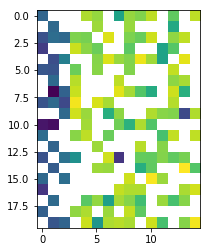

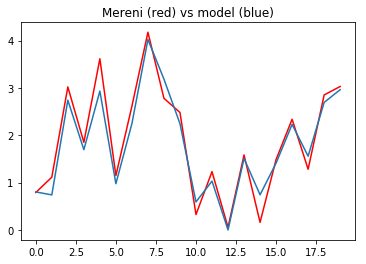

In [6]:
p = 20 ### pocet mereni
n = 15 # pocet regresnich koeficientu

if 1:
    # matice regresnich koeficientu
    X = np.random.randn(p,n)
    ind = X < 0
    X[ind] = 0
    # tento vektor budeme odhadovat
    beta_true = np.array([0,0,0,1,0,0,1,1,1,0,0,0,0,0,0])

    # chceme spatnou podminenost
    ind = [0,1,2]
    X[:,ind] = X[:,ind]/100
    
    # chceme sum = noise
    y = np.transpose(X@beta_true + 0.3*np.random.randn(p)) ### sila sumu je volitelna
    y.shape = (p,1)
    ind2 = y<0
    y[ind2] = 0
    #print(y)
else:
    # data pouzita v prednasce
    X = sio.loadmat("lin_reg_data.mat")["X"]
    y = sio.loadmat("lin_reg_data.mat")["y"]
    beta_true = sio.loadmat("lin_reg_data.mat")["beta_true"]
    #print(y)

plt.imshow(np.log(X),interpolation='none')

#---------------------------------------------
# vykreslete do jednoho grafu mereni a generovana data
plt.figure()
plt.title('Mereni (red) vs model (blue)')
plt.plot(y, 'red') # mereni
plt.plot(X@beta_true) # model
#---------------------------------------------

## Obyčejné nejmenší čtverce

X: (20, 15)
y: (20, 1)


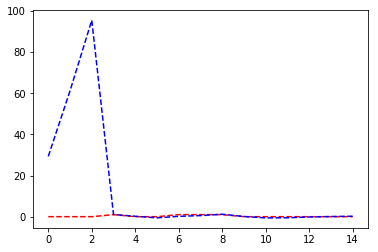

In [14]:
X = np.matrix(X)
y = np.matrix(y)
print("X:", X.shape)
print("y:", y.shape)
beta_ols = np.linalg.inv(X.T*X)*X.T*y
#---------------------------------------------
# spocitejte a vykreslete reseni pomoci nejmensich ctvercu
#---------------------------------------------

plt.plot(beta_true,color='red',linestyle='dashed')
plt.plot(beta_ols,color='blue',linestyle='dashed')

## Nejmenší čtverce s Tichonovovou regularizací

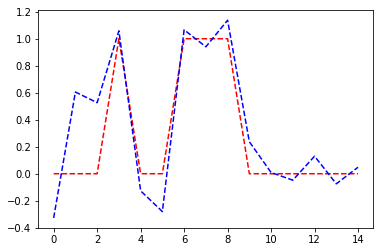

In [18]:
alpha = 1e-2 ### regularizacni koeficient
beta_tich = np.linalg.inv(X.T*X + alpha*np.identity(n))*X.T*y
#---------------------------------------------
# spocitejte a vykreslete reseni pomoci nejmensich ctvercu s Tichonovou regularizaci
#---------------------------------------------

plt.plot(beta_true,color='red',linestyle='dashed')
plt.plot(beta_tich,color='blue',linestyle='dashed')

### Pro rychlejší (nyní přeskočte): hledání parametru $\alpha$ pomocí L-křivky
...tedy zobrazení grafu $||\boldsymbol{\beta}||$ vůči $||\mathbf{y}-X\boldsymbol{\beta}||$.

In [ ]:
norm_b = []
norm_yXb = []

#---------------------------------------------
# spocitejte pro danny rozsah normy vhodne pro vytvoreni L-krivku
# L-krivku vykreslete a vyberte vhodne alpha
#---------------------------------------------
for i in range(-30,30):
    alpha = np.power(10,i/10)
    #...

    
plt.subplot(211)
plt.plot(norm_b,norm_yXb,'x')

#---------------------------------------------
# vybrane alpha pouzijte a vysledek vykreslete
#---------------------------------------------

plt.subplot(212)
plt.plot(beta_true,color='red',linestyle='dashed')


## Bayesovská ridge regression
Připomeňme soustavu implicitních rovnic (odvozenou na přednášce) pro aposteriorní rozdělení $\tilde{f}(\boldsymbol{\beta}|\mathbf{y})=\mathcal{N}(\mu_\boldsymbol{\beta},\Sigma_\boldsymbol{\beta})$ a $\tilde{f}(\omega|\mathbf{y})=\mathcal{G}(c,d)$ s tvarovacími parametry:
$$
\Sigma_{\boldsymbol{\beta}}= \left(\widehat{\omega}X^{T}X+I_{n}\right)^{-1}
$$
$$
\mu_{\boldsymbol{\beta}}= \Sigma_{\boldsymbol{\beta}}\widehat{\omega}X^{T}\mathbf{y}
$$
$$
c= c_{0}+\frac{p}{2}\\
$$
$$
d= d_{0}+\frac{1}{2}\left(\mathbf{y}^{T}\mathbf{y}-2\mathbf{y}^{T}X\widehat{\boldsymbol{\beta}}+\text{trace}[\widehat{\boldsymbol{\beta}\boldsymbol{\beta}^{T}}X^{T}X]\right)
$$
...a příslušné momenty:
$$
\widehat{\boldsymbol{\beta}} = \mu_{\boldsymbol{\beta}}
$$
$$
\widehat{\boldsymbol{\beta}\boldsymbol{\beta}^T} = \mu_{\boldsymbol{\beta}}\mu_{\boldsymbol{\beta}}^T + \Sigma_{\boldsymbol{\beta}}
$$
$$
\widehat{\omega} = c/d
$$

hat_omega: ()


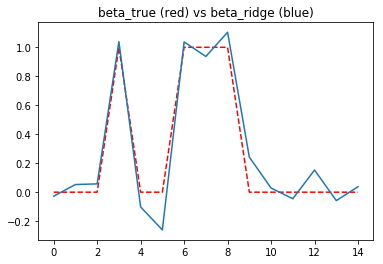

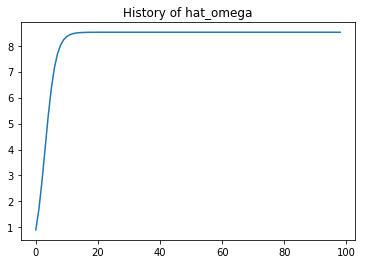

In [29]:
c0 = 1e-10
d0 = 1e-10
X = np.array(X)
y = np.array(y)
hat_omega = 1/np.ndarray.max(X)
print("hat_omega:", hat_omega.shape)

hist_omega = []
for i in range(1,100): # budeme iterovat 100x, uvidime, ze to staci
    #---------------------------------------------
    # spocitejte tvarovaci parametry a momenty \beta
    #---------------------------------------------
    sigma_beta = np.linalg.inv(hat_omega*X.T@X + np.identity(n))
    mu_beta = hat_omega*sigma_beta@X.T@y
    hat_beta = mu_beta
    hat_beta_betaT = mu_beta@mu_beta.T + sigma_beta    
    
    #---------------------------------------------
    # spocitejte tvarovaci parametry a momenty \omega
    #---------------------------------------------
    c = c0 + p/2
    d = d0 + 0.5*(y.T@y - 2*y.T@X@hat_beta + np.trace(hat_beta_betaT@X.T@X))
    hat_omega = c/d
    
    hist_omega.append(hat_omega[0])

# vysledek ulozime a vytiskneme
beta_VBridge = hat_beta
    
plt.title('beta_true (red) vs beta_ridge (blue)')
plt.plot(beta_true,color='red',linestyle='dashed')
plt.plot(beta_VBridge)

#---------------------------------------------
# pro rychlejsi: ukladejte hodnoty \omega v prubehu iteraci a graf vyvoje vytisknete
#---------------------------------------------
plt.figure()
plt.title('History of hat_omega')
plt.plot(hist_omega)

## Bayesovská sparse regression
$$
\Sigma_{\boldsymbol{\beta}}= \left(\widehat{\omega}X^{T}X+diag(\widehat{v})\right)^{-1}
$$
$$
\mu_{\boldsymbol{\beta}}= \Sigma_{\boldsymbol{\beta}}\widehat{\omega}X^{T}\mathbf{y}
$$
$$
c= c_{0}+\frac{p}{2}
$$
$$
d= d_{0}+\frac{1}{2}\left(\mathbf{y}^{T}\mathbf{y}-2\mathbf{y}^{T}X\widehat{\boldsymbol{\beta}}+\text{trace}[\widehat{\boldsymbol{\beta}\boldsymbol{\beta}^{T}}X^{T}X]\right)
$$
$$
a_j = a_0 + \frac{1}{2}
$$
$$
b_j = b_0 + \frac{1}{2}(\widehat{\boldsymbol{\beta}\boldsymbol{\beta}^{T}})_{j,j}
$$
...a příslušné momenty:
$$
\widehat{\boldsymbol{\beta}} = \mu_{\boldsymbol{\beta}}
$$
$$
\widehat{\boldsymbol{\beta}\boldsymbol{\beta}^T} = \mu_{\boldsymbol{\beta}}\mu_{\boldsymbol{\beta}}^T + \Sigma_{\boldsymbol{\beta}}
$$
$$
\widehat{\omega} = c/d
$$
$$
\widehat{v}_j = \frac{a_j}{b_j}
$$

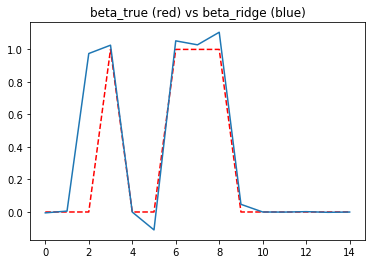

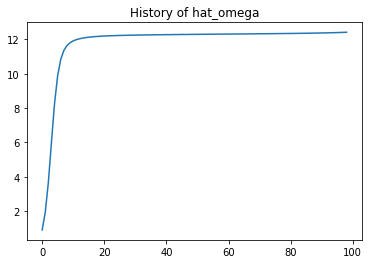

In [33]:
c0 = 1e-10
d0 = 1e-10
a0 = 1e-10
b0 = 1e-10

hat_v = np.ones(n)
hat_omega = 1/np.ndarray.max(X)
hist_omega = []

for i in range(1,100):
    #---------------------------------------------
    # spocitejte tvarovaci parametry a momenty \beta
    #---------------------------------------------
    sigma_beta = np.linalg.inv(hat_omega*X.T@X + np.diag(hat_v))
    mu_beta = hat_omega*sigma_beta@X.T@y
    hat_beta = mu_beta
    hat_beta_betaT = mu_beta@mu_beta.T + sigma_beta
    
    #---------------------------------------------
    # spocitejte tvarovaci parametry a momenty vektoru "v"
    #---------------------------------------------
    aj = (a0 + 0.5) * np.ones(n)
    bj = b0 + 0.5*hat_beta_betaT.diagonal()
    hat_v = aj / bj 
    
    #---------------------------------------------
    # spocitejte tvarovaci parametry a momenty \omega (staci zkopirovat z predchoziho)
    #---------------------------------------------
    c = c0 + p/2
    d = d0 + 0.5*(y.T@y - 2*y.T@X@hat_beta + np.trace(hat_beta_betaT@X.T@X))
    hat_omega = c/d
    
    hist_omega.append(hat_omega[0])
    
# vysledek ulozime a vytiskneme
beta_VBsparse = hat_beta
    
plt.title('beta_true (red) vs beta_ridge (blue)')
plt.plot(beta_true,color='red',linestyle='dashed')
plt.plot(beta_VBsparse)

plt.figure()
plt.title('History of hat_omega')
plt.plot(hist_omega)